In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
videos = pd.read_csv('/Volumes/NO NAME/Data Analytics Project -Python/1-Youtube Text Data Analysis/UScomments.csv',error_bad_lines=False) 
# Preview the first 5 lines of the loaded data 
videos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/Users/jaylenebautista/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
!pip install textblob

In [6]:
from textblob import TextBlob

#TextBlob is a Python 3 library for processing textual data. 
#It provides a simple API for diving into common natural language processing (NLP) tasks such as:
#part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

In [7]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity
#polarity tells us if the comment is positive or negative. In this case it is neutral 

0.0

In [8]:
polarity=[]
for i in videos['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
            polarity.append(0) 

In [9]:
videos['polarity']=polarity

In [10]:
videos.head(20)

video_id                                       comment_text likes  \
0   XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1   XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2   XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3   XpVt6Z1Gjjo                                MY FAN . attendance     3   
4   XpVt6Z1Gjjo                                         trending 😉     3   
5   XpVt6Z1Gjjo                            #1 on trending AYYEEEEE     3   
6   XpVt6Z1Gjjo                               The end though 😭👍🏻❤️     4   
7   XpVt6Z1Gjjo                               #1 trending!!!!!!!!!     3   
8   XpVt6Z1Gjjo                        Happy one year vlogaversary     3   
9   XpVt6Z1Gjjo  You and your shit brother may have single hand...     0   
10  XpVt6Z1Gjjo             There should be a mini Logan Paul too!     0   
11  XpVt6Z1Gjjo  Dear Logan, I really wanna get your Merch but ...     0   
12  XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
13  XpVt6Z1Gjjo                   Casey is still better then logan     0   
14  XpVt6Z1Gjjo      aw geez rick this guy is the face of YouTube.     0   
15  XpVt6Z1Gjjo                       He happy cause he in a movie     0   
16  XpVt6Z1Gjjo  Ayyyyoooo Logang what up .  This was a hard vl...     1   
17  XpVt6Z1Gjjo  Bro y didnt u give merch to johannes he is ur ...     0   
18  XpVt6Z1Gjjo  It's been fun watching you grow. I'm at 42 day...     3   
19  XpVt6Z1Gjjo             Made a lot of people hate youtube - GJ     0   

   replies  polarity  
0        0  0.000000  
1        0  0.000000  
2        0  0.000000  
3        0  0.000000  
4        0  0.000000  
5        0  0.000000  
6        0  0.000000  
7        0  0.000000  
8        0  0.800000  
9        0 -0.135714  
10       0  0.000000  
11       0  0.200000  
12       0 -0.023333  
13       0  0.500000  
14       0  0.000000  
15       0  0.800000  
16       0 -0.291667  
17       0  0.000000  
18       0  0.250000  
19       0 -0.800000

In [11]:
#Exploratory Data Analysis for the positive sentences. 
comments_positive=videos[videos['polarity']==1] #Polarity=1 means positive filter
comments_positive.head()

video_id                                       comment_text likes  \
64   XpVt6Z1Gjjo                                    yu are the best     1   
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [12]:
#use wordcloud to show which words are repeated the most.
!pip install wordcloud

In [13]:
from wordcloud import WordCloud,STOPWORDS   #STOPWORDS removes repeated words

In [14]:
total_comments=(''.join(comments_positive['comment_text']))
len(total_comments)

827171

(-0.5, 999.5, 499.5, -0.5)

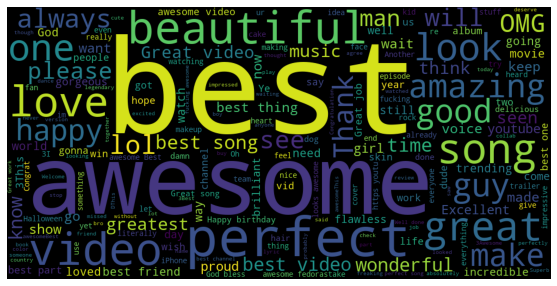

In [15]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [16]:
#EDA for negative comments 
comments_negative=videos[videos['polarity']==-1]
comments_negative.head()

video_id                                       comment_text likes  \
512   8wNr-NQImFg  BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...     0   
562   8wNr-NQImFg  Well… The brain surgeon Ben Carson just proved...     0   
952   Ayb_2qbZHm4         WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!     0   
1371  vu_9muoxT50                                     WTF BRUH!!!!!!     0   
1391  vu_9muoxT50                    cheeseus christ thats insane!!!     0   

     replies  polarity  
512        0      -1.0  
562        0      -1.0  
952        0      -1.0  
1371       0      -1.0  
1391       0      -1.0

In [17]:
total_comments=(''.join(comments_negative['comment_text']))
len(total_comments)

187280

(-0.5, 999.5, 499.5, -0.5)

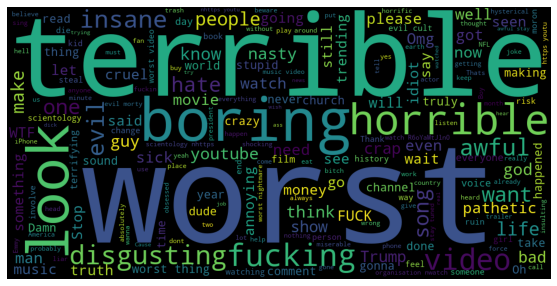

In [18]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [19]:
#Analyzing Trending Tags and Views of YouTube & Performing an Analysis on Likes, Views, and Dislikes and How They Co-Relate 

In [20]:
videos2=pd.read_csv('/Volumes/NO NAME/Data Analytics Project -Python/1-Youtube Text Data Analysis/USvideos.csv',error_bad_lines=False)
videos2.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [21]:
#create a string by inserting the tags.

In [22]:
tags_complete=(''.join(videos2['tags']))

In [23]:
videos2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [24]:
#Import library:regular expression library. Call substitution function. Replace what I have with a space.
import re

In [25]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)

In [26]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   lifeApple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge vergejacksfilms parody parodies iphone iphone x iphone   apple emojia   a   films a   trailers independent films trailer HD official movie film a   movies oscar winne

In [27]:
#only want one space
tags=re.sub(' +',' ',tags)

In [28]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button M subscribers logan paul year vlogging year vlog dwarf mamba play button logan paul history youtube history M M plaque youtube button diamond button logang logang lifeApple iPhone iPhone Ten iPhone Portrait Lighting A Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone none apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone apple iphone ios the verge vergejacksfilms parody parodies iphone iphone x iphone apple emojia a films a trailers independent films trailer HD official movie film a movies oscar winner academy award winner The Disaster Arti

In [29]:
#Data is now ready to analyze. Insert Wordcloud 

(-0.5, 999.5, 499.5, -0.5)

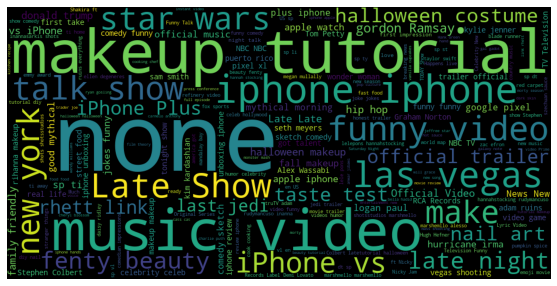

In [30]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [31]:
#Perform analysis on likes, views and dislikes and find how they co-relate with each other.
#Call a regression plot to see how they co-relate to each other.

Text(0.5, 1.0, 'Regression Plot For Likes vs. Views')

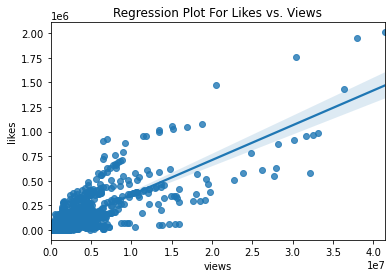

In [32]:
sns.regplot(data=videos2,x='views',y='likes')
plt.title('Regression Plot For Likes vs. Views')

Text(0.5, 1.0, 'Regression Plot For Dislikes vs. Views')

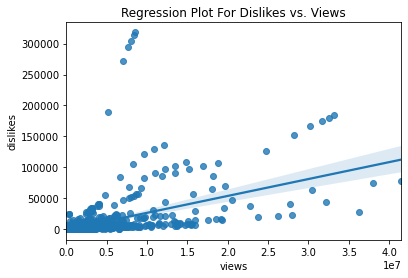

In [33]:
#As views increase so do likes. 
#Now let's see views vs. dislikes.

sns.regplot(data=videos2,x='views',y='dislikes')
plt.title('Regression Plot For Dislikes vs. Views')

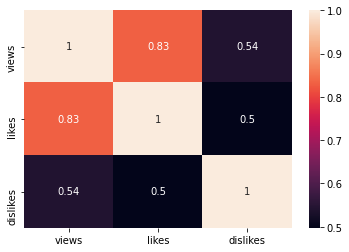

In [34]:
#As views increase dislikes are less likely.
#How are all three co-related?

df_corr=videos2[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)        #This will give us the correlation percentages

In [91]:
#Analyze emoji's in comments.
#Pull up data and install emoji library.

videos.head()

video_id                                       comment_text likes  \
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4   
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

In [92]:
!pip install emoji

In [93]:
import emoji

In [96]:
#Do I have any missing values in my data?

videos['comment_text'].isna().sum()

0

In [97]:
#df.dropna(inplace=True)

In [98]:
len(videos['comment_text'])   #length of a video comment

691375

In [99]:
#Fetch comment with emoji's
videos['comment_text'][4]

'trending 😉'

In [100]:
#Every emoji has a Unicode associated with it.
#Example
'\U0001F600'

'😀'

In [101]:
#Consider only comments with emoji's.
comment='trending 😉'
[c for c in comment if c in emoji.UNICODE_EMOJI] #This will return the emoji in the comment

['😉']

In [102]:
#Find emoji's of the entire data

str=''
for i in videos['comment_text']:
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [103]:
print(str)

‼‼‼😉😭👍🏻❤😍💋💙👍👈😂🔥😂😂😂😂👻❤😂❤💎😆😆😆😆😆😆😁😁😁😁😁😁😁😂😂😂😂😭😒👏👏👏👏👏👏👏👏👏👏😊❤👈😂😂👌👌🤔👈😂😂😁💔😂👎👎👎👎👎🍎😤😂😂😂😂👈😭😭😭😢😢😢😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂💋💋👫💘😻💋💋💖💖💖💖💖💖💖💖💖💖💖💖💖💖🌟🌟😮😮😮😮😮😮😮😮😮👈😊👇🏻😳😳❤👈😠😆😂😆😂😆😊😠😴😴😴😴👈🤔😂😝😂😂😂👍😂™👈☺😔😩😩😡😍😍😍😍😍😍😂🙏🏻😄☺😬😊👍🏻😊☹🤷🤣🤣🤣🤣😃😃😃😃👌🏽🍏🍎😓😂😂🤣🤣❤❤😂🤦🏽♀😞😂🙏🏼😂😂😂✌😂😂😂😂😂😂😂😂😂😂😊😂😂😂😂😂😂😔😂😂😂😂😭😭😭😭💀😂😂👀😂😂😂😱❤😂😂😂😂😂😂😂😂😂❤❤👑👑👑😂😂😍😍😍🌮🌮🌮🌮🌮😂😀😂😂😂😂😂😂😂💆🏿♂🔥👏👏👏😊😅😆😆😆😆😂😂😂😂😂😂🌟🌟😮😮😮😮😮😮😮😮😮😂😂😂😂❤❤❤🐂💩💕😉😍😍😍😍❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤❤💓💓💓💓💓💓💓❤❤❤❤❤❤❤❤❤💗💗😢💝💝❤💙😭❤🙏❤😍😍😍😍😍💜💜💜😎😂❤😊😒😱👏👏👏😎😱😱😱😱🎉🤔😂😂😂😂😋😋😍😍😍😘😱😳😘😘😍😍😐😉😍😊😕😄😞🔥🔥🔥🔥🔥🤘🏻😱😱😂😊😭😂😂😍👍😆🙌🙌🙌🌟🌟😮😮😮😮😮😮😮😮😮👍🏼💕😀😂😂😂😂😂😂😂😊😂😂😂😂😏😏🇪🇸😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😊😂😂😍💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😞💕😫😥👍💪😂😂😂😂😂😂😊😊😊😊😂😊😂😂😂😂😂😂😂😂😂😂🙏🏻❤🙏🙏🙏😓❤🇨🇺😂🙂🙂💋💋👫💘😻💋💋😊💖💖💖❤😎😎✌😀😀😀😀😊😊❤❤❤❤😊😄🙈😻😂😂😂🙌🏻🤘❤😂❤🤣🤣🤣🤣🤣🤣😂😂😂😂😂😂😊😊😊😊😲😍❤😘😘😘😘😘❤❤😂❤❤❤❤😍😍😍😍😍😍😍😍😍💕🤢🤢🤢👍👍👍👍👍👍👍👍👍👍👍🎧🎶🎵🎼🎤✌💪👏👏👏👏👏👏👌♨💯🔥🔥🔥🔥🔥🔥🔥🔥🔥👌👍💪👊✌😊😍😎😁💏💖😂😂😊🙃😂😂😂😂😂🤣😂😂😂😅😅😂🐸😂😂🏈💁🏼😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😊😍😎💄🐐😊🤡💖💖💖❤😂😂😂😻😻😻😄😍😍😍😍😍🤣😂😇👌🏻😂☺😀😂❤😂😂😂😂😂😂😂😂😳❤🐊👀❤🌎😂❤❤😍😊😊😎🤘🖤👌👌😅😂😂😊😊👀👌🏽❤😂😊🤣😂😂👍😍😍😕😂😏❤❤🔥🔥❤😍😍😍😍😍😊🤗😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😍😍😍👍👍😗👍🏼👍🏼😂❤😻😻😓😲😢😊😊😂😍😍😊😬😍💗💖💖😂😂😂💖😆😆😆😘😘😘❤❤🔥😂😂😂😂😂😊😂😂📱📱📱📱📱📱📱📱📱📱📱😇😇😇😳😕😕😕😕😊🌀

In [104]:
len(str)

304745

In [105]:
#unique emoji's
len(set(str))

1123

In [106]:
#Create Dictionary

res={i:str.count(i)for i in set(str)}
res

{'🥁': 23,
 '😏': 623,
 '🇹': 490,
 '📿': 14,
 '🍿': 43,
 '🚍': 5,
 '🚽': 25,
 '🍀': 35,
 '🍼': 52,
 '🚼': 16,
 '🕖': 5,
 '🛅': 5,
 '🐷': 38,
 '😒': 629,
 '💜': 3429,
 '🚤': 8,
 '🖤': 784,
 '📒': 8,
 '🐹': 12,
 '🔥': 8694,
 '☎': 13,
 '🎦': 7,
 '🆔': 4,
 '🐇': 28,
 '🍶': 29,
 '❣': 521,
 '🕑': 4,
 '😳': 398,
 '🚇': 7,
 '👯': 49,
 '☮': 17,
 '🏹': 7,
 '📅': 11,
 '🕌': 6,
 '😣': 381,
 '⛰': 3,
 '⚰': 28,
 '🉑': 4,
 '🤽': 8,
 '😘': 5545,
 '👦': 69,
 '👆': 70,
 '📔': 7,
 '⚙': 2,
 '✒': 18,
 '🚿': 7,
 '✈': 42,
 '📤': 6,
 '♏': 13,
 '🚳': 6,
 '🚉': 4,
 '💗': 2144,
 '😔': 545,
 '🍘': 7,
 '🥐': 10,
 '🌎': 94,
 '🗓': 3,
 '✉': 17,
 '♋': 12,
 '🕒': 4,
 '🖇': 3,
 '🌦': 7,
 '😛': 266,
 '🏁': 18,
 '🌧': 11,
 '🤖': 27,
 '🌘': 4,
 '🎿': 5,
 '😊': 3596,
 '🍄': 19,
 '🛒': 5,
 '👨': 212,
 '🚀': 98,
 '🔽': 11,
 '🏬': 8,
 '♌': 7,
 '🥞': 9,
 '👥': 12,
 '💫': 107,
 '🔣': 5,
 '🔟': 2,
 '🎡': 12,
 '🎌': 5,
 '↘': 8,
 '👃': 27,
 '⭐': 198,
 '🌏': 55,
 '♦': 15,
 '🎎': 3,
 '🕚': 4,
 '🎆': 86,
 '🍺': 69,
 '🖲': 2,
 '🕠': 4,
 '😸': 75,
 '🤥': 50,
 '✡': 4,
 '🔉': 12,
 '🇴': 158,
 '🍓': 252,
 '👚': 9,
 '👄': 9

In [107]:
#sort the dictionary

res={k:v for k, v in sorted(res.items(),key=lambda item:item[1])}
res

{'🤟': 1,
 '🤪': 1,
 '♾': 1,
 '🧢': 1,
 '🤬': 1,
 '🤭': 1,
 '⚙': 2,
 '🔟': 2,
 '🖲': 2,
 '🏷': 2,
 '🛢': 2,
 '☣': 2,
 '⏸': 2,
 '🎏': 2,
 '⚗': 2,
 '⚒': 2,
 '⏯': 2,
 '☦': 2,
 '🗄': 2,
 '🖨': 2,
 '⏺': 2,
 '🤨': 2,
 '⏹': 2,
 '⏭': 2,
 '⛰': 3,
 '🗓': 3,
 '🖇': 3,
 '🎎': 3,
 '🤺': 3,
 '🖌': 3,
 '◻': 3,
 '🔳': 3,
 '💹': 3,
 '🗃': 3,
 '🏎': 3,
 '🗳': 3,
 '🏮': 3,
 '🚕': 3,
 '🕉': 3,
 '🗞': 3,
 '☂': 3,
 '🛣': 3,
 '🗜': 3,
 '⏲': 3,
 '🛩': 3,
 '🗒': 3,
 '⚛': 3,
 '➗': 3,
 '🧐': 3,
 '📴': 3,
 '🕹': 3,
 '🚏': 3,
 '☸': 3,
 '🔖': 3,
 '◼': 3,
 '🛶': 3,
 '🕳': 3,
 '🏑': 3,
 '🗂': 3,
 '⏮': 3,
 '◽': 3,
 '🆔': 4,
 '🕑': 4,
 '🉑': 4,
 '🚉': 4,
 '🕒': 4,
 '🌘': 4,
 '🕚': 4,
 '🕠': 4,
 '✡': 4,
 '🕟': 4,
 '➿': 4,
 '⌨': 4,
 '🈺': 4,
 '⛓': 4,
 '↕': 4,
 '🔃': 4,
 '🛫': 4,
 '🚐': 4,
 '🔚': 4,
 '🕣': 4,
 '🖼': 4,
 '🛬': 4,
 '🌥': 4,
 '⏪': 4,
 '🎚': 4,
 '🏘': 4,
 '🖊': 4,
 '🔏': 4,
 '🚎': 4,
 '🈂': 4,
 '🕔': 4,
 '🛵': 4,
 '🎞': 4,
 '🕜': 4,
 '🔗': 4,
 '🚛': 4,
 '🌫': 4,
 '🎽': 4,
 '🥜': 4,
 '🏚': 4,
 '🛃': 4,
 '🦏': 4,
 '🦍': 4,
 '↖': 4,
 '❔': 4,
 '🈷': 4,
 '🕗': 4,
 '🆚': 4,
 '🕘': 4,
 '🏛': 4,
 

In [108]:
#store emoji in keys from the list

keys=[*res.keys()]
values=[*res.values()]

In [109]:
keys[0]

'🤟'

In [113]:
#create dataframe for most frequently used emoji

df=pd.DataFrame({'char':keys[-20:],'num':values[-20:]})
df

char    num
0     🤣   2279
1     🏼   2549
2     😢   2672
3     💙   2831
4     👌   3112
5     😬   3381
6     💜   3429
7     🏻   3438
8     😊   3596
9     ♥   4909
10    💕   5147
11    💖   5359
12    👍   5476
13    😘   5545
14    👏   5719
15    😭   8398
16    🔥   8694
17    ❤  31119
18    😍  33453
19    😂  36987

In [114]:
!pip install plotly
import plotly.graph_objs as go
from plotly.offline import iplot

In [115]:
trace=go.Bar(x=df['char'],
            y=df['num'])
iplot([trace])